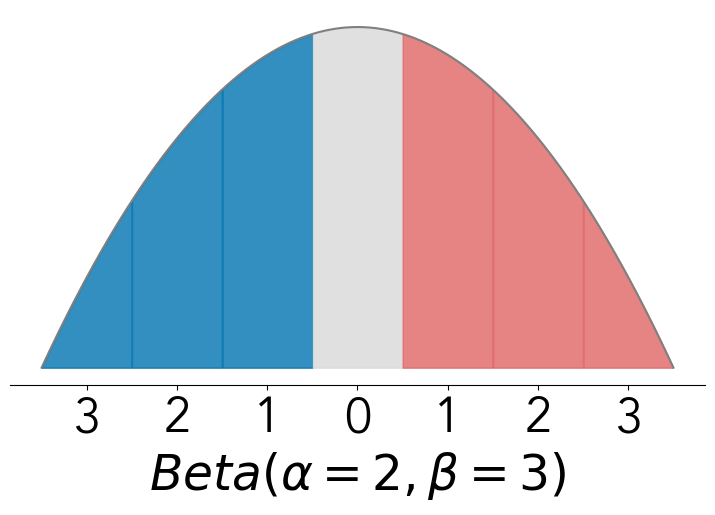

In [33]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_beta(a, b, ax, label=None, **kwargs):

    plt.rcParams['font.family'] = "Avenir"
    plt.rcParams['font.size'] = "35"

    x = np.linspace(0, 1, 1000)
    ax.plot(x, beta.pdf(x, a, b), label=label, **kwargs, color='grey')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    sns.despine(left=True, bottom=False)

    colors = ['#0173B2', '#0173B2', '#0173B2', '#D9D9D9', '#E06666', '#E06666', '#E06666']
    # split the range on the x-axis in 7 equally sized parts and fill in between
    split_points = np.linspace(0, 1, 8)
    for i in range(1, 8):
        ax.fill_between(x, beta.pdf(x, a, b), where=(x < split_points[i]) & (x >= split_points[i-1]), alpha=0.8, color=colors[i-1], zorder=-200)

    return ax

fig, ax = plt.subplots(figsize=(8, 6))

plot_beta(2, 2, ax, label='1, 1')

xticks = np.linspace(0, 1, 8)[:-1] + 1/14  # shift ticks to be at the center of each bin
ax.set_xticks(xticks)
ax.set_xticklabels([3, 2, 1, 0, 1, 2, 3])
ax.set_yticks([])
ax.set_xlabel(r'$Beta(\alpha=2, \beta=3)$')
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
plt.tight_layout()
plt.savefig('beta_2_2.pdf')
plt.show()


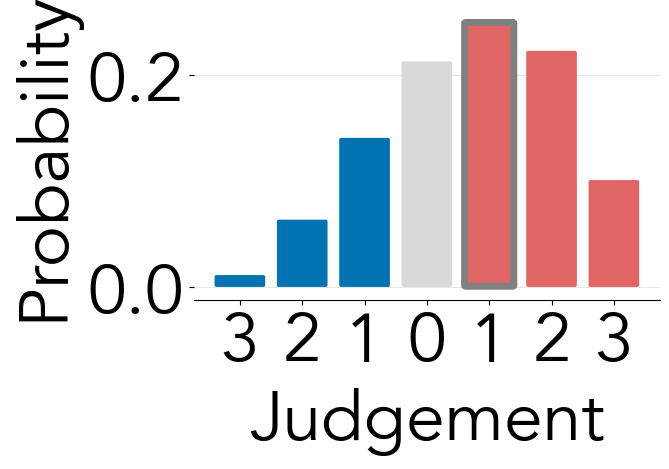

In [40]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plots import get_fancy_bbox, get_palette, lighten_color

def plot_bins(a, b, ax, **kwargs):
    plt.rcParams['font.family'] = "Avenir"
    plt.rcParams['font.size'] = "50"

    # Define the bins.
    split_points = np.linspace(0, 1, 8)

    # Calculate the mass in each bin.
    masses = [beta.cdf(split_points[i], a, b) - beta.cdf(split_points[i-1], a, b) for i in range(1, 8)]
    
    # Create an array for the x-coordinates of the bars.
    x = np.arange(len(masses))

    # Generate the bars.
    ax.bar(x, masses, color='grey', **kwargs)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    sns.despine(left=True, bottom=False)

    # Define the colors for each bar (bin).
    colors = ['#0173B2', '#0173B2', '#0173B2', '#D9D9D9', '#E06666', '#E06666', '#E06666']

    new_patches = []

    for i, patch in enumerate(ax.patches):
      
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = get_fancy_bbox(bb, "round,pad=-0.005,rounding_size=0.02", color, mutation_aspect=0.05)
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)
    
    # Color each bar according to the defined colors.
    for i, bar in enumerate(ax.patches):
        bar.set_color(colors[i])

    # Add a gray frame to the fifth bar
    ax.patches[4].set_edgecolor('grey')
    ax.patches[4].set_linewidth(5)


    # Set labels and ticks for the x-axis.
    xticks = np.arange(0, 7)
    ax.set_xticks(xticks)
    ax.set_xticklabels([3, 2, 1, 0, 1, 2, 3])

    return ax

fig, ax = plt.subplots(figsize=(8, 6))
plot_bins(3, 2, ax)
ax.set_xlabel(r'Judgement')
ax.set_ylabel('Probability')
plt.tight_layout()
plt.savefig('beta_3_2_discrete.pdf')
plt.show()
